# Preprocessing Data Analysis

In [6]:
import pandas as pd
import tensorflow
import keras
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from datasets import load_dataset
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

#nltk.download('stopwords')
#nltk.download('punkt')

ds = load_dataset("fancyzhx/amazon_polarity")

In [8]:
def concantinate(data_frame):
    data_frame["text"] = data_frame["title"] +  " " + data_frame['content']
    return data_frame

df = ds.map(concantinate)

In [10]:
train = df['train']
test = df['test']

num_train = len(train)
num_test = len(test)

In [12]:
def filter_negative_reviews(ex):
    return ex['label'] == 0

def filter_positive_reviews(ex):
    return ex['label'] == 1

num_train_pos = len(train.filter(filter_positive_reviews))
num_train_neg = len(train.filter(filter_negative_reviews))
num_test_pos = len(test.filter(filter_positive_reviews))
num_test_neg = len(test.filter(filter_negative_reviews))

In [14]:
prop_train_pos = num_train_pos / num_train
prop_train_neg = num_train_neg / num_train
prop_test_pos = num_test_pos / num_test
prop_test_neg = num_test_neg / num_test

In [16]:
def preprocess_text_w_stopwords(data_frame):
    data_frame['processed_text_w_stopwords'] = re.sub(r'[^a-z\s]', '', data_frame["text"].lower())
    return data_frame

df = df.map(preprocess_text_w_stopwords)

In [20]:
stop_words = set(stopwords.words('english'))

def preprocess_text_w_o_stopwords(data_frame):
    text = re.sub(r'[^a-z\s]', '', data_frame["text"].lower())

    words = text.split()

    words_w_o_stop_words = [word for word in words if word not in stop_words]

    data_frame['processed_text_w_o_stopwords'] = list(words_w_o_stop_words)
    return data_frame

df = df.map(preprocess_text_w_o_stopwords)

Map:   0%|          | 0/3600000 [00:00<?, ? examples/s]

Map:   0%|          | 0/400000 [00:00<?, ? examples/s]

In [22]:
train_word_freq = {0: [], 1:[]}

for entry in df['train']:
    label = entry['label']
    words = entry['processed_text_w_o_stopwords']

    train_word_freq[label].extend(words)

train_word_counts = {label: Counter(words) for label, words in train_word_freq.items()}

In [156]:
test_word_freq = {0: [], 1:[]}

for entry in df['test']:
    label = entry['label']
    words = entry['processed_text_w_o_stopwords']

    test_word_freq[label].extend(words)

test_word_counts = {label: Counter(words) for label, words in test_word_freq.items()}

In [210]:
df_list = []

for label, word_counts in train_word_counts.items():
    word_counts = list(word_counts.items())
    for word, count in word_counts:
        df_list.append([label, word, count])

train_word_counts_df = pd.DataFrame(df_list, columns=['label', 'word', 'count'])

In [212]:
df_list = []

for label, word_counts in test_word_counts.items():
    word_counts = list(word_counts.items())
    for word, count in word_counts:
        df_list.append([label, word, count])

test_word_counts_df = pd.DataFrame(df_list, columns=['label', 'word', 'count'])

In [246]:
train_top_neg = train_word_counts_df.loc[train_word_counts_df['label'] == 0].sort_values(by = "count", ascending = False)[:10]
train_top_pos = train_word_counts_df.loc[train_word_counts_df['label'] == 1].sort_values(by = "count", ascending = False)[:10]
test_top_neg = test_word_counts_df.loc[test_word_counts_df['label'] == 0].sort_values(by = "count", ascending = False)[:10]
test_top_pos = test_word_counts_df.loc[test_word_counts_df['label'] == 1].sort_values(by = "count", ascending = False)[:10]




/var/folders/_g/ppwl61ys0td4mk4md686c0sw0000gn/T/ipykernel_70118/633427134.py:1: UserWarning: The palette list has more values (20) than needed (10), which may not be intended.
  fig1 = sns.barplot(x = train_top_neg["word"], y = train_top_neg["count"],


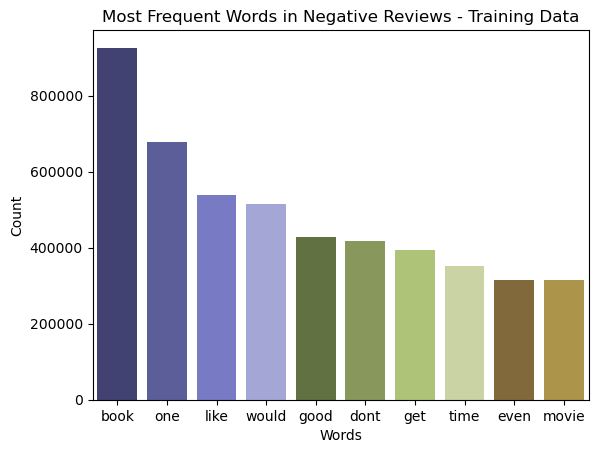

In [302]:
fig1 = sns.barplot(x = train_top_neg["word"], y = train_top_neg["count"], 
                   palette = sns.color_palette('tab20b'), hue = train_top_neg["word"])
fig1.set(title = "Most Frequent Words in Negative Reviews - Training Data", 
         xlabel = "Words", ylabel = "Count")
plt.savefig("figure1.png")

/var/folders/_g/ppwl61ys0td4mk4md686c0sw0000gn/T/ipykernel_70118/1622426098.py:1: UserWarning: The palette list has more values (20) than needed (10), which may not be intended.
  fig2 = sns.barplot(x = train_top_pos["word"], y = train_top_pos["count"],


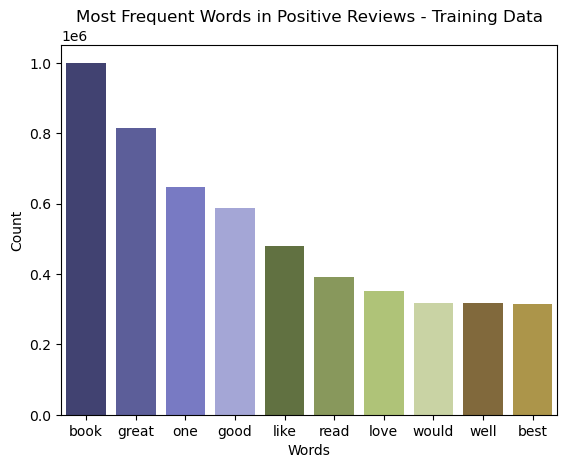

In [304]:
fig2 = sns.barplot(x = train_top_pos["word"], y = train_top_pos["count"], 
                   palette = sns.color_palette('tab20b'), hue = train_top_pos["word"])
fig2.set(title = "Most Frequent Words in Positive Reviews - Training Data", 
         xlabel = "Words", ylabel = "Count")
plt.savefig("figure2.png")

/var/folders/_g/ppwl61ys0td4mk4md686c0sw0000gn/T/ipykernel_70118/1962999578.py:1: UserWarning: The palette list has more values (20) than needed (10), which may not be intended.
  fig3 = sns.barplot(x = test_top_neg["word"], y = test_top_neg["count"],


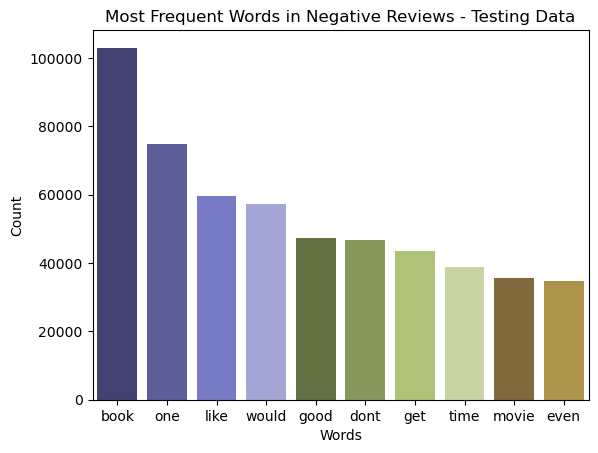

In [306]:
fig3 = sns.barplot(x = test_top_neg["word"], y = test_top_neg["count"], 
                   palette = sns.color_palette('tab20b'), hue = test_top_neg["word"])
fig3.set(title = "Most Frequent Words in Negative Reviews - Testing Data", 
         xlabel = "Words", ylabel = "Count")
plt.savefig("figure3.png")

/var/folders/_g/ppwl61ys0td4mk4md686c0sw0000gn/T/ipykernel_70118/3250287519.py:1: UserWarning: The palette list has more values (20) than needed (10), which may not be intended.
  fig4 = sns.barplot(x = test_top_pos["word"], y = test_top_pos["count"],


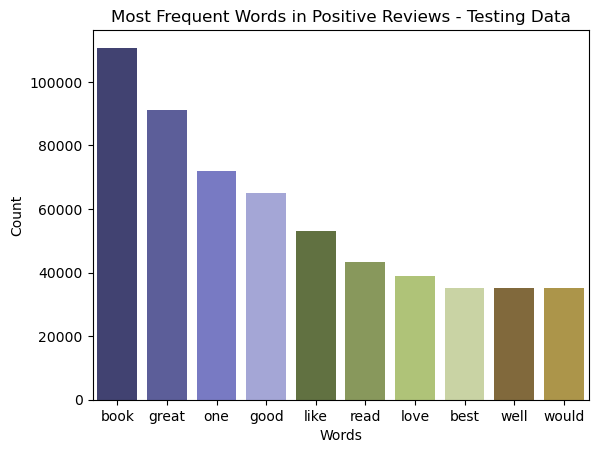

In [308]:
fig4 = sns.barplot(x = test_top_pos["word"], y = test_top_pos["count"], 
                   palette = sns.color_palette('tab20b'), hue = test_top_pos["word"])
fig4.set(title = "Most Frequent Words in Positive Reviews - Testing Data", 
         xlabel = "Words", ylabel = "Count")
plt.savefig("figure4.png")